***Prepare a jupyter notebook (recommended - Google Colab) to build, train and evaluate a Machine Learning model on the given dataset. Please read the instructions carefully.
Part A
Dataset - https://drive.google.com/file/d/1xS-hVwIZdO5yVkFt6BL3xbi2UUOEim0Z/view?usp=sharing
Data were collected on 81 patients undergoing corrective spinal surgery (Bell et al., 1989). The objective was to determine important risk factors for kyphosis following surgery. The risk factors are age in years, the starting vertebrae level of the surgery and the number of levels involved.***
1. Import Libraries/Dataset
a. Download the dataset

b. Import the required libraries

2. Data Visualization and Exploration
a. Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

b. Print the description and shape of the dataset.

c. Provide appropriate visualization to get an insight about the dataset.

d. Try exploring the data and see what insights can be drawn from the dataset.

3. Data Pre-processing and cleaning
a. Do the appropriate preprocessing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Apply appropriate feature engineering techniques for them.

b. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset.

c. Do the correlational analysis on the dataset. Provide a visualization for the same.

4. Data Preparation
a. Do the final feature selection and extract them into Column X and the class label into Column into Y.

b. Split the dataset into training and test sets.

Part B
1. Model Building
a. Perform Model Development using at least three models, separately. You are free to apply any Machine Learning Models on the dataset. Deep Learning Models are strictly not allowed.

b. Train the model and print the training accuracy and loss values.

2. Performance Evaluation
a. Print the confusion matrix. Provide appropriate analysis for the same.

b. Do the prediction for the test data and display the results for the inference.

Instructions for Assignment Evaluation

1. Organise your code in separate sections for each task. Add comments to make the code readable.
2. Deep Learning Models are strictly not allowed. You are encouraged to learn classical Machine learning techniques and experience their behavior.
3. Notebooks with output is required.

## importing libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## importing Dataset

In [67]:
data=pd.read_csv("kyphosis.csv")

## Data Visualization and Exploration

In [68]:
data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


## a. Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them

In [69]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## b. Print the description and shape of the dataset 

In [70]:
data.shape

(81, 4)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [72]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [73]:
data.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [74]:
data.dtypes

Kyphosis    object
Age          int64
Number       int64
Start        int64
dtype: object

## c. Provide appropriate visualization to get an insight about the dataset. 

<AxesSubplot:xlabel='Kyphosis', ylabel='count'>

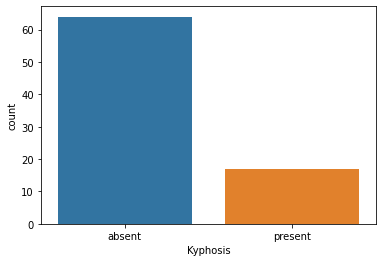

In [75]:
sns.countplot(data['Kyphosis'], label = "Count") 

<AxesSubplot:>

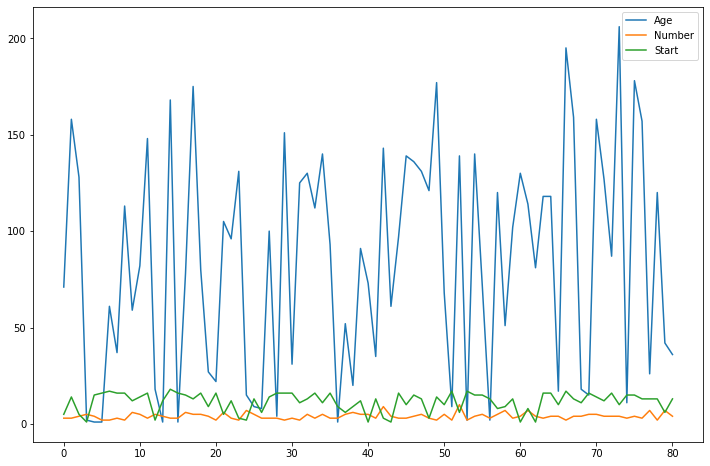

In [76]:
data.plot(figsize=(12,8))

<AxesSubplot:xlabel='Age', ylabel='Number'>

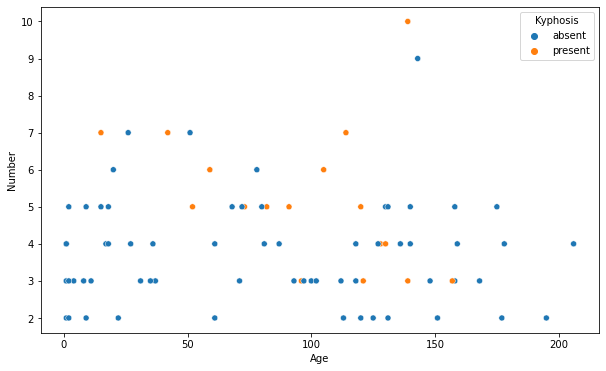

In [77]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=data['Age'],y=data['Number'],hue=data['Kyphosis'])

<AxesSubplot:xlabel='Start', ylabel='Number'>

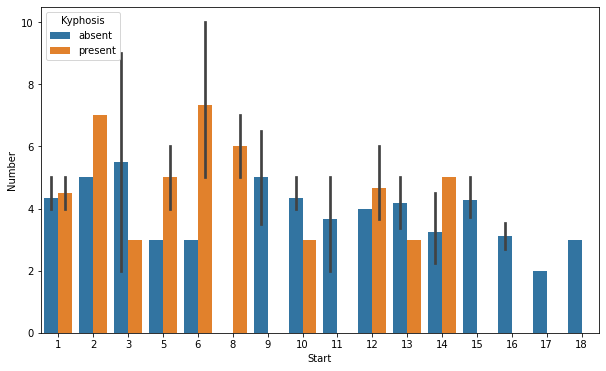

In [78]:
plt.figure(figsize=(10,6))
sns.barplot(x='Start' ,y='Number',hue='Kyphosis',data=data)

## Data Pre-processing and cleaning

## a. Do the appropriate preprocessing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Apply appropriate feature engineering techniques for them. 

In [79]:
data.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [80]:
data.nunique()

Kyphosis     2
Age         64
Number       8
Start       16
dtype: int64

In [81]:
data['Kyphosis'].unique()

array(['absent', 'present'], dtype=object)

In [82]:
data['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [83]:
data['Kyphosis']

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

*** Kyphosis value are in categorical form, so we have to tranform into numerical form ***

In [84]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
data['Kyphosis'] = LabelEncoder_y.fit_transform(data['Kyphosis'])

In [85]:
data

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [86]:
Kyphosis_Present = data[data['Kyphosis']==1]

In [87]:
Kyphosis_Absent = data[data['Kyphosis']==0]

In [88]:
print( 'Disease present after operation percentage =', (len(Kyphosis_Present) / len(data) )*100,"%")

Disease present after operation percentage = 20.98765432098765 %


In [89]:
print( 'Disease absent after operation percentage =', (len(Kyphosis_Absent) / len(data) )*100,"%")

Disease absent after operation percentage = 79.01234567901234 %


## Data Preparation


## a. Do the final feature selection and extract them into Column X and the class label into
Column into Y.

In [90]:
x = data.drop(['Kyphosis'],axis=1)
y = data['Kyphosis']


In [91]:
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [92]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int32

## b. Split the dataset into training and test sets.


In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

## Part B 

# 1. Model Building
a. Perform Model Development using at least three models, separately. You are free to
apply any Machine Learning Models on the dataset. Deep Learning Models are strictly
not allowed.

## LinearRegression

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [97]:
y_pred=reg.predict(x_test)

In [98]:
from sklearn import metrics 
mse=metrics.mean_squared_error(y_test,y_pred)
print("Mean_squared_error:",mse)

Mean_squared_error: 0.16023182312345982


In [99]:
rmse=np.sqrt(mse)
print("Root_Mean_squared_Error:",rmse)

Root_Mean_squared_Error: 0.40028967401553067


## LogisticRegression 

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [102]:
y_pred=log_reg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

In [104]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy_Score:", acc)

Accuracy_Score: 0.8235294117647058


In [105]:
confusion_matrix(y_test, y_pred)

array([[14,  0],
       [ 3,  0]], dtype=int64)

## KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
k_range=list(range(3,12))
accu=[]


In [109]:
from sklearn import metrics 
for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    accu.append(metrics.accuracy_score(y_test,y_pred))

In [110]:
accu

[0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058]

In [111]:
knn=KNeighborsClassifier(n_neighbors=7).fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [112]:
metrics.accuracy_score(y_test,y_pred)

0.8235294117647058

## 2. Performance Evaluation
a. Print the confusion matrix. Provide appropriate analysis for the same 

In [113]:
confusion_matrix(y_test, y_pred)

array([[14,  0],
       [ 3,  0]], dtype=int64)

*** we got 3 false  prediction out and 14 correct prediction ***